## Find the total energy in terms of simulation steps

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.ndimage import convolve , generate_binary_structure

Initialise a random configuration of spins in a N x N lattice

In [332]:
N = 32
beta = 0.60
J = 1
p = 1 - np.exp(-2 * beta * J )

In [320]:
def fn_initialise(N):
    initial_random_num_arr = np.random.random((N,N))
    initial_arr = np.zeros((N,N))
    initial_arr[initial_random_num_arr >= 0.5] = -1
    initial_arr[initial_random_num_arr < 0.5] = 1
    return initial_arr

In [321]:
def fn_totalE(arr):
    kernel = generate_binary_structure(2,1) #rank = 2 (2D lattice structure) , connectivity = 1 (only 4 nearest neighbours, diagonal atoms are not neighbours)
    array = -arr * convolve(arr , kernel , mode = 'constant',cval = 0)
    return array.sum() * J

In [322]:
def fn_select_seed(arr):
    rand_x = int(np.random.randint(0,N))
    rand_y = int(np.random.randint(0,N))
    initial_spin_value = arr[rand_y][rand_x]
    flipped_spin_value = initial_spin_value * (-1)
    arr[rand_y][rand_x] = flipped_spin_value
    return initial_spin_value , arr , rand_x , rand_y

In [323]:
def fn_neighbour_list(arr, x, y):
    neighbour_arr = []

    if(y > 0): #above
        neighbour_arr.append([x , y - 1 , arr[y - 1][x]])
    if(x > 0): #right
        neighbour_arr.append([x - 1 , y , arr[y][x - 1]])
    if (y < N-1 ): #down
        neighbour_arr.append([x , y + 1 , arr[y + 1][x]])
    if (x < N-1 ): #left
        neighbour_arr.append([x + 1 , y , arr[y][x + 1]])
    return neighbour_arr


In [324]:
def fn_flip(arr,x, y, initial_spin_val):
    if (arr[y][x] == initial_spin_val):
        flip_probability = random.random()
        if(flip_probability < p):
            arr[y][x] = initial_spin_val * (-1)
            return True
        else:
            return False
    else:
        return False

In [325]:
def fn_traverse(arr , initial_spin_value, x , y, neigh_arr):
    if not fn_flip(arr,x,y , initial_spin_value):
        return
    
    for n in neigh_arr:   
        next_neigh_arr = fn_neighbour_list(arr , n[0],  n[1])
        fn_traverse(arr , initial_spin_value , n[0] , n[1] , next_neigh_arr)

In [326]:
def fn_wolff_alg(arr):
    #step1: select a random spin in the lattice
    initial_spin_value , arr , rand_x , rand_y = fn_select_seed(arr)

    first_neighbour_arr = fn_neighbour_list(arr,rand_x , rand_y)

    for n in first_neighbour_arr:
        next_neigh_arr = fn_neighbour_list(arr , int(n[0]),  int(n[1]))
        fn_traverse(arr , initial_spin_value , int(n[0]) , int(n[1]) , next_neigh_arr)

    return arr

In [ ]:
total_iteration_num = 500
iteration_arr = []
energy_arr = []

lattice_arr = fn_initialise(N)

In [334]:
for i in range(total_iteration_num):
    lattice_arr = fn_wolff_alg(lattice_arr)
    iteration_arr.append(i)
    energy_arr.append(fn_totalE(lattice_arr)) 

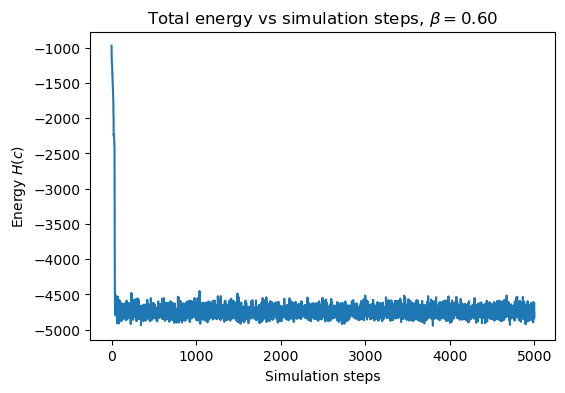

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6, 4))
plt.xlabel(r'Simulation steps')
plt.ylabel(r'Energy $H(c)$')
plt.title(r'Total energy vs simulation steps, $\beta = 0.60$')
plt.plot(iteration_arr, energy_arr)
plt.show()



<Figure size 640x480 with 0 Axes>